In [30]:
# 1. Import Libraries
# ===============================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os, zipfile
from google.colab import files

In [33]:
2.# Upload Dataset ZIP
# ===============================
print("👉 Please upload your dataset ZIP (with 'train' and 'test' folders inside)...")
uploaded = files.upload()   # select your ZIP file


👉 Please upload your dataset ZIP (with 'train' and 'test' folders inside)...


Saving archive (4).zip to archive (4) (2).zip


In [34]:
3.#Unzip Dataset
# ===============================
zip_path = list(uploaded.keys())[0]  # get uploaded filename
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [36]:
4. #Detect Dataset Folder Dynamically
# ===============================
unzipped_folders = [f for f in os.listdir("/content") if os.path.isdir(os.path.join("/content", f))]
print("Folders in /content:", unzipped_folders)

data_dir = None
# Check if train and test are directly in /content
if os.path.exists("/content/train") and os.path.exists("/content/test"):
    data_dir = "/content"
else:
    # Original logic to find a parent folder containing train and test
    for folder in unzipped_folders:
        if os.path.exists(os.path.join("/content", folder, "train")) and \
           os.path.exists(os.path.join("/content", folder, "test")):
            data_dir = os.path.join("/content", folder)
            break


if data_dir is None:
    raise FileNotFoundError("⚠️ Could not find a folder containing 'train' and 'test'. Check your ZIP structure.")
else:
    print("✅ Found dataset folder:", data_dir)

train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
print("Train classes:", os.listdir(train_dir))
print("Test classes:", os.listdir(test_dir))

Folders in /content: ['.config', 'train', 'test', 'drive', 'sample_data']
✅ Found dataset folder: /content
Train classes: ['happy', 'fear', 'surprise', 'angry', 'sad', 'disgust', 'neutral']
Test classes: ['happy', 'fear', 'surprise', 'angry', 'sad', 'disgust', 'neutral']


In [37]:
# 5. Create ImageDataGenerators
# ===============================
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [38]:
# 6. Build CNN Model
# ===============================
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(48,48,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 7. Train the Model
# ===============================
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 129s 141ms/step - accuracy: 0.2652 - loss: 1.7852 - val_accuracy: 0.4305 - val_loss: 1.4812
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 130s 145ms/step - accuracy: 0.4282 - loss: 1.4842 - val_accuracy: 0.4794 - val_loss: 1.3462
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 125s 139ms/step - accuracy: 0.4848 - loss: 1.3439 - val_accuracy: 0.4999 - val_loss: 1.2976
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 125s 139ms/step - accuracy: 0.5078 - loss: 1.2821 - val_accuracy: 0.5242 - val_loss: 1.2409
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 123s 137ms/step - accuracy: 0.5350 - loss: 1.2255 - val_accuracy: 0.5358 - val_loss: 1.1943
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 123s 137ms/step - accuracy: 0.5527 - loss: 1.1741 - val_accuracy: 0.5408 - val_loss: 1.1965
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 121s 135ms/step - accuracy: 0.5733 - loss: 1.1178 - val_accuracy: 0.5485 - val_loss: 1.1867
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 128s 142ms/step - accuracy: 0.5968 - loss: 1.05

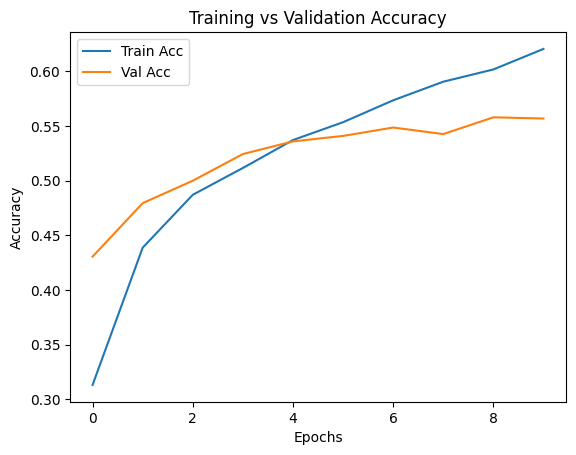

In [40]:
# 8. Plot Training History

plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step


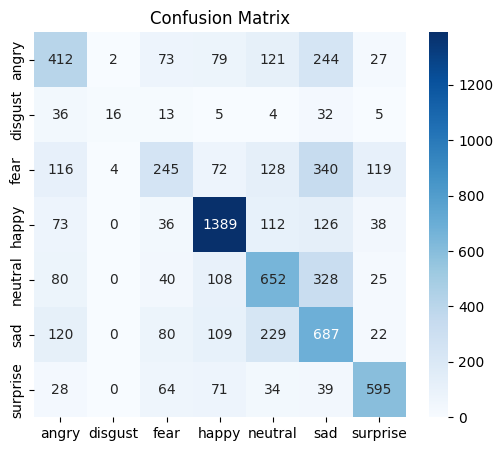


Classification Report:

              precision    recall  f1-score   support

       angry       0.48      0.43      0.45       958
     disgust       0.73      0.14      0.24       111
        fear       0.44      0.24      0.31      1024
       happy       0.76      0.78      0.77      1774
     neutral       0.51      0.53      0.52      1233
         sad       0.38      0.55      0.45      1247
    surprise       0.72      0.72      0.72       831

    accuracy                           0.56      7178
   macro avg       0.57      0.48      0.49      7178
weighted avg       0.56      0.56      0.55      7178



In [41]:
# 9. Evaluate Model
# ===============================
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(test_generator.classes, y_pred,
                            target_names=list(test_generator.class_indices.keys())))